Yet another flying-by-the-seat-of-my-pants notebook -- because I *still* haven't been able to give Susan Athey's work the time it very much deserves. Nor have I finally read Steve Brunton's book!

But lets say you think that some machine learning model doesn't just fit the data, but that it describes the dynamics of a system like a physics theory. In that case, the model provides a guess about the effect of a change of one of the input variables.

If one assumes that the true equations describing the system are well-behaved, then a linear model might be a reasonable local approximation to those equations.

### No noise, correct explanatory variables

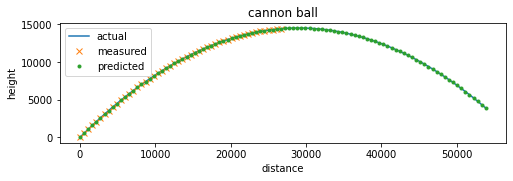

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

def cannonball(t,noise=0):
    x0 = np.array([0,0]).reshape(-1,1).T
    v0 = 762
    angle = np.pi*45/180
    g = -10
    return x0*t**0 + v0*np.array([np.cos(angle),np.sin(angle)]).reshape(-1,1).T*t + 0.5*np.array([0,g]).reshape(-1,1).T*t**2 + noise*v0*np.random.randn(len(t),2)


t = np.linspace(0,100,100).reshape(-1,1)
position = cannonball(t)


N = len(t)//2
t_measured = t[:N]
position_measured = position[:N]


explanatory_variables_train = np.hstack([t_measured,t_measured**2])
explanatory_variables_test = np.hstack([t,t**2])


model = LinearRegression().fit(explanatory_variables_train,position_measured)

position_predicted = model.predict(explanatory_variables_test)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.plot(position[:,0],position[:,1])
ax.plot(position_measured[:,0],position_measured[:,1],'x')
ax.plot(position_predicted[:,0],position_predicted[:,1],'.')


ax.set_aspect("equal")
ax.set_xlabel("distance")
ax.set_ylabel("height")
ax.set_title("cannon ball")

ax.legend("actual,measured,predicted".split(','))

### Noise, correct explanatory variables

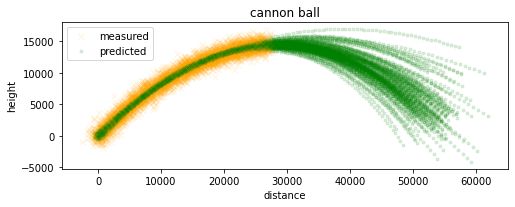

In [2]:
t = np.linspace(0,100,100).reshape(-1,1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

for i in range(100):
    position = cannonball(t,noise=1)


    N = len(t)//2
    t_measured = t[:N]
    position_measured = position[:N]


    explanatory_variables_train = np.hstack([t_measured,t_measured**2])
    explanatory_variables_test = np.hstack([t,t**2])


    model = LinearRegression().fit(explanatory_variables_train,position_measured)

    position_predicted = model.predict(explanatory_variables_test)



    #ax.plot(position[:,0],position[:,1])
    ax.plot(position_measured[:,0],position_measured[:,1],'x',alpha=0.125,color='orange')
    ax.plot(position_predicted[:,0],position_predicted[:,1],'.',alpha=0.125,color='green')


    ax.set_aspect("equal")
    ax.set_xlabel("distance")
    ax.set_ylabel("height")
    ax.set_title("cannon ball")

    ax.legend("measured,predicted".split(','))

# Noise, extra terms

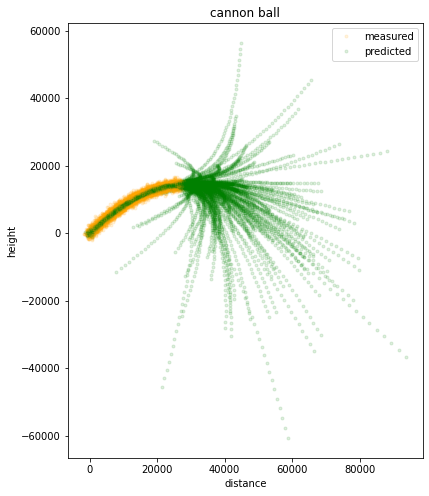

In [3]:
t = np.linspace(0,100,100).reshape(-1,1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

for i in range(100):
    position = cannonball(t,noise=1)


    N = len(t)//2
    t_measured = t[:N]
    position_measured = position[:N]


    explanatory_variables_train = np.hstack([t_measured,t_measured**2,t_measured**3])
    explanatory_variables_test = np.hstack([t,t**2,t**3])


    model = LinearRegression().fit(explanatory_variables_train,position_measured)

    position_predicted = model.predict(explanatory_variables_test)



    #ax.plot(position[:,0],position[:,1])
    ax.plot(position_measured[:,0],position_measured[:,1],'.',alpha=0.125,color='orange')
    ax.plot(position_predicted[:,0],position_predicted[:,1],'.',alpha=0.125,color='green')


    ax.set_aspect("equal")
    ax.set_xlabel("distance")
    ax.set_ylabel("height")
    ax.set_title("cannon ball")

    ax.legend("measured,predicted".split(','))